# Transformación de datos

### <font color=#845600> Resumen de datos por agrupación

**Carga de librerías**

In [2]:
import pandas as pd

**Importado de datos**

In [3]:
df = pd.read_excel("sales-funnel.xlsx")
#df.info()
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


**Referencia**

https://pbpython.com/pandas-pivot-table-explained.html

#### <font color=#845600> Extraer valores únicos

In [5]:
# Valores únicos de la columna product
df['Product'].unique().tolist()

['CPU', 'Software', 'Maintenance', 'Monitor']

#### <font color=#845600> Función groupby

La función groupby calculará la información para aquellas variables que los permitan, es decir, si se busca hallar la sumatoria, la operación solo se llevará a cabo con las columnas de typo numérico.

In [7]:
df1 = df.groupby(['Manager']).sum()[['Quantity','Price']]
df1

,Quantity,Price
Manager,,
Debra Henley,13,235000
Fred Anderson,17,287000


Los valores faltantes pueden ser identificados

In [15]:
l = [[1, 2, 3],
     [1, None, 4],
     [2, 1, 3],
     [1, 2, 2]]
dfx = pd.DataFrame(l, columns=["a", "b", "c"])
dfx.groupby(by=["b"], dropna=False).sum()
#dfx.groupby(by=["b"], dropna=True).sum()

,a,c
b,,
1.0,2,3
2.0,2,5
NaN,1,4


In [16]:
df1 = df.groupby(['Manager','Name']).sum()[['Quantity','Price']]
df1

Quantity   Price
Manager       Name                                          
Debra Henley  Barton LLC                           1   35000
              Fritsch, Russel and Anderson         1   35000
              Jerde-Hilpert                        2    5000
              Kiehn-Spinka                         2   65000
              Kulas Inc                            3   50000
              Trantow-Barrows                      4   45000
Fred Anderson Herman LLC                           2   65000
              Kassulke, Ondricka and Metz          3    7000
              Keeling LLC                          5  100000
              Koepp Ltd                            4   70000
              Purdy-Kunde                          1   30000
              Stokes LLC                           2   15000

##### Group by: Una columna

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

In [9]:
df.groupby(by = 'sex').mean(numeric_only = True)

,total_bill,tip,size
sex,,,
Female,18.056897,2.833448,2.459770
Male,20.744076,3.089618,2.630573


##### Group by: Varias columnas

In [11]:
df.groupby(by=['sex', 'smoker']).sum(numeric_only = True)

total_bill     tip  size
sex    smoker                          
Female No          977.68  149.77   140
       Yes         593.27   96.74    74
Male   No         1919.75  302.00   263
       Yes        1337.07  183.07   150

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
df.groupby(by = ['sex', 'smoker'])[['total_bill','tip','size']].agg(['sum', 'mean'])

total_bill                tip           size          
                     sum       mean     sum      mean  sum      mean
sex    smoker                                                       
Female No         977.68  18.105185  149.77  2.773519  140  2.592593
       Yes        593.27  17.977879   96.74  2.931515   74  2.242424
Male   No        1919.75  19.791237  302.00  3.113402  263  2.711340
       Yes       1337.07  22.284500  183.07  3.051167  150  2.500000

In [3]:
df.groupby(by = ['sex', 'smoker']).agg(max_total_bill = ('total_bill', 'max'),
                                       min_total_bill = ('total_bill', 'min'))

max_total_bill  min_total_bill
sex    smoker                                
Female No               35.83            7.25
       Yes              44.30            3.07
Male   No               48.33            7.51
       Yes              50.81            7.25

##### Group by: Diferentes grupos de agregación

In [10]:
df.groupby(by = ['sex','smoker']).agg({'total_bill':['sum', 'mean'],
                                       'tip':['sum','mean']})

total_bill                tip          
                     sum       mean     sum      mean
sex    smoker                                        
Female No         977.68  18.105185  149.77  2.773519
       Yes        593.27  17.977879   96.74  2.931515
Male   No        1919.75  19.791237  302.00  3.113402
       Yes       1337.07  22.284500  183.07  3.051167

In [2]:
agg_criteria = {'total_bill': 'sum', 
                'tip': 'mean'}

df.groupby(by=['sex', 'smoker']).agg(agg_criteria)

total_bill       tip
sex    smoker                      
Female No          977.68  2.773519
       Yes         593.27  2.931515
Male   No         1919.75  3.113402
       Yes        1337.07  3.051167

##### Group by: Diferentes grupos de agregación eliminando índices

In [3]:
df.groupby(by = ['sex', 'smoker'], as_index = False).agg(agg_criteria)

,sex,smoker,total_bill,tip
0,Female,No,977.68,2.773519
1,Female,Yes,593.27,2.931515
2,Male,No,1919.75,3.113402
3,Male,Yes,1337.07,3.051167


#### <font color=#845600> Función pivottable

Primero, transformamos la columna 'Status' en categorías (no es obligatorio)

In [61]:
df1 = df.copy()
df1["Status"] = df1["Status"].astype("category")
df1['Status'] = df1["Status"].cat.set_categories(["won","pending","presented","declined"])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Account   17 non-null     int64   
 1   Name      17 non-null     object  
 2   Rep       17 non-null     object  
 3   Manager   17 non-null     object  
 4   Product   17 non-null     object  
 5   Quantity  17 non-null     int64   
 6   Price     17 non-null     int64   
 7   Status    17 non-null     category
dtypes: category(1), int64(3), object(4)
memory usage: 1.3+ KB


In [62]:
# Por defecto, la función calcula la media
df2 = pd.pivot_table(df1, index = ['Manager','Rep'], values = ['Quantity'], aggfunc = np.sum)
df2

Quantity
Manager       Rep                    
Debra Henley  Craig Booker          5
              Daniel Hilton         5
              John Smith            3
Fred Anderson Cedric Moss           5
              Wendy Yule           12

In [64]:
df2 = pd.pivot_table(df1, index = ['Manager','Rep'], values = ['Price'], aggfunc = [np.mean,len])
df2

mean   len
                                    Price Price
Manager       Rep                              
Debra Henley  Craig Booker   20000.000000     4
              Daniel Hilton  38333.333333     3
              John Smith     20000.000000     2
Fred Anderson Cedric Moss    27500.000000     4
              Wendy Yule     44250.000000     4

In [67]:
df2 = pd.pivot_table(df1,
                     index=["Manager","Rep"],
                     values=["Price"],
                     columns=["Product"],
                     aggfunc=[np.sum])
df2

sum                             
                                Price                             
Product                           CPU Maintenance Monitor Software
Manager       Rep                                                 
Debra Henley  Craig Booker    65000.0      5000.0     NaN  10000.0
              Daniel Hilton  105000.0         NaN     NaN  10000.0
              John Smith      35000.0      5000.0     NaN      NaN
Fred Anderson Cedric Moss     95000.0      5000.0     NaN  10000.0
              Wendy Yule     165000.0      7000.0  5000.0      NaN

In [68]:
df2 = pd.pivot_table(df1,
                     index=["Manager","Rep"],
                     values=["Price"],
                     columns=["Product"],
                     aggfunc=[np.sum],
                    fill_value = 0)
df2

sum                             
                              Price                             
Product                         CPU Maintenance Monitor Software
Manager       Rep                                               
Debra Henley  Craig Booker    65000        5000       0    10000
              Daniel Hilton  105000           0       0    10000
              John Smith      35000        5000       0        0
Fred Anderson Cedric Moss     95000        5000       0    10000
              Wendy Yule     165000        7000    5000        0

In [71]:
df2 = pd.pivot_table(df1,
                     index=["Manager","Rep"],
                     values=["Price", 'Quantity'],
                     columns=["Product"],
                     aggfunc=[np.sum],
                    fill_value = 0)
df2

sum                                        \
                              Price                              Quantity   
Product                         CPU Maintenance Monitor Software      CPU   
Manager       Rep                                                           
Debra Henley  Craig Booker    65000        5000       0    10000        2   
              Daniel Hilton  105000           0       0    10000        4   
              John Smith      35000        5000       0        0        1   
Fred Anderson Cedric Moss     95000        5000       0    10000        3   
              Wendy Yule     165000        7000    5000        0        7   

                                                          
                                                          
Product                     Maintenance Monitor Software  
Manager       Rep                                         
Debra Henley  Craig Booker            2       0        1  
              Daniel Hilton           0       0        1  
              John Smith              2       0        0  
Fred Anderson Cedric Moss             1       0        1  
              Wendy Yule              3       2        0

In [72]:
df2 = pd.pivot_table(df1,
                     index=['Manager','Rep','Product'],
                     values=['Price', 'Quantity'],
                     aggfunc=[np.sum],
                     fill_value = 0)
df2

sum         
                                          Price Quantity
Manager       Rep           Product                     
Debra Henley  Craig Booker  CPU           65000        2
                            Maintenance    5000        2
                            Software      10000        1
              Daniel Hilton CPU          105000        4
                            Software      10000        1
              John Smith    CPU           35000        1
                            Maintenance    5000        2
Fred Anderson Cedric Moss   CPU           95000        3
                            Maintenance    5000        1
                            Software      10000        1
              Wendy Yule    CPU          165000        7
                            Maintenance    7000        3
                            Monitor        5000        2

In [76]:
# Agregar los totales
df2 = pd.pivot_table(df1,
                     index=['Manager','Rep','Product'],
                     values=['Price', 'Quantity'],
                     aggfunc=[np.sum,np.mean],
                     fill_value = 0,
                     margins = True,
                     margins_name = "Total")
df2

sum                   mean  \
                                          Price Quantity         Price   
Manager       Rep           Product                                      
Debra Henley  Craig Booker  CPU           65000        2  32500.000000   
                            Maintenance    5000        2   5000.000000   
                            Software      10000        1  10000.000000   
              Daniel Hilton CPU          105000        4  52500.000000   
                            Software      10000        1  10000.000000   
              John Smith    CPU           35000        1  35000.000000   
                            Maintenance    5000        2   5000.000000   
Fred Anderson Cedric Moss   CPU           95000        3  47500.000000   
                            Maintenance    5000        1   5000.000000   
                            Software      10000        1  10000.000000   
              Wendy Yule    CPU          165000        7  82500.000000   
                            Maintenance    7000        3   7000.000000   
                            Monitor        5000        2   5000.000000   
Total                                    522000       30  30705.882353   

                                                   
                                         Quantity  
Manager       Rep           Product                
Debra Henley  Craig Booker  CPU          1.000000  
                            Maintenance  2.000000  
                            Software     1.000000  
              Daniel Hilton CPU          2.000000  
                            Software     1.000000  
              John Smith    CPU          1.000000  
                            Maintenance  2.000000  
Fred Anderson Cedric Moss   CPU          1.500000  
                            Maintenance  1.000000  
                            Software     1.000000  
              Wendy Yule    CPU          3.500000  
                            Maintenance  3.000000  
                            Monitor      2.000000  
Total                                    1.764706

In [79]:
# El orden de las categorías coincide con el orden anteriormente desarrollado
df2 = pd.pivot_table(df1,
                     index=['Manager','Status'],
                     values=['Price'],
                     aggfunc=[np.sum],
                     fill_value = 0,
                     margins = True,
                     margins_name = "Total")
df2

sum
                          Price
Manager       Status           
Debra Henley  won         65000
              pending     50000
              presented   50000
              declined    70000
Fred Anderson won        172000
              pending      5000
              presented   45000
              declined    65000
Total                    522000

In [82]:
# Ejecutar varias operaciones a un grupo de columnas
df2 = pd.pivot_table(df1,
                     index=['Manager','Status'],
                     columns=['Product'],
                     values=['Quantity','Price'],
                     aggfunc ={"Quantity":len,"Price":np.sum},
                     fill_value = 0)
df2

Price                              Quantity  \
Product                     CPU Maintenance Monitor Software      CPU   
Manager       Status                                                    
Debra Henley  won         65000           0       0        0        1   
              pending     40000       10000       0        0        1   
              presented   30000           0       0    20000        1   
              declined    70000           0       0        0        2   
Fred Anderson won        165000        7000       0        0        2   
              pending         0        5000       0        0        0   
              presented   30000           0    5000    10000        1   
              declined    65000           0       0        0        1   

                                                      
Product                 Maintenance Monitor Software  
Manager       Status                                  
Debra Henley  won                 0       0        0  
              pending             2       0        0  
              presented           0       0        2  
              declined            0       0        0  
Fred Anderson won                 1       0        0  
              pending             1       0        0  
              presented           0       1        1  
              declined            0       0        0

In [83]:
# Ejecutar varias operaciones a un grupo de columnas
df2 = pd.pivot_table(df1,
                     index=['Manager','Status'],
                     columns=['Product'],
                     values=['Quantity','Price'],
                     aggfunc ={"Quantity":len,"Price":[np.sum,np.mean]},
                     fill_value = 0)
df2

Price                                       \
                          mean                                  sum   
Product                    CPU Maintenance Monitor Software     CPU   
Manager       Status                                                  
Debra Henley  won        65000           0       0        0   65000   
              pending    40000        5000       0        0   40000   
              presented  30000           0       0    10000   30000   
              declined   35000           0       0        0   70000   
Fred Anderson won        82500        7000       0        0  165000   
              pending        0        5000       0        0       0   
              presented  30000           0    5000    10000   30000   
              declined   65000           0       0        0   65000   

                                                     Quantity              \
                                                          len               
Product                 Maintenance Monitor Software      CPU Maintenance   
Manager       Status                                                        
Debra Henley  won                 0       0        0        1           0   
              pending         10000       0        0        1           2   
              presented           0       0    20000        1           0   
              declined            0       0        0        2           0   
Fred Anderson won              7000       0        0        2           1   
              pending          5000       0        0        0           1   
              presented           0    5000    10000        1           0   
              declined            0       0        0        1           0   

                                          
                                          
Product                 Monitor Software  
Manager       Status                      
Debra Henley  won             0        0  
              pending         0        0  
              presented       0        2  
              declined        0        0  
Fred Anderson won             0        0  
              pending         0        0  
              presented       1        1  
              declined        0        0

Es posible filtrar las tablas generadas anteriormente...

In [84]:
df2 = pd.pivot_table(df1,
                     index=['Manager','Status'],
                     columns=['Product'],
                     values=['Quantity','Price'],
                     aggfunc ={"Quantity":len,"Price":[np.sum,np.mean]},
                     fill_value = 0)
df2.query('Manager == ["Debra Henley"]')

Price                                                  \
                         mean                                 sum               
Product                   CPU Maintenance Monitor Software    CPU Maintenance   
Manager      Status                                                             
Debra Henley won        65000           0       0        0  65000           0   
             pending    40000        5000       0        0  40000       10000   
             presented  30000           0       0    10000  30000           0   
             declined   35000           0       0        0  70000           0   

                                        Quantity                               
                                             len                               
Product                Monitor Software      CPU Maintenance Monitor Software  
Manager      Status                                                            
Debra Henley won             0        0        1           0       0        0  
             pending         0        0        1           2       0        0  
             presented       0    20000        1           0       0        2  
             declined        0        0        2           0       0        0

In [85]:
df2 = pd.pivot_table(df1,
                     index=['Manager','Status'],
                     columns=['Product'],
                     values=['Quantity','Price'],
                     aggfunc ={"Quantity":len,"Price":[np.sum,np.mean]},
                     fill_value = 0)
df2.query('Status == ["pending","won"]')

Price                                                   \
                        mean                                  sum               
Product                  CPU Maintenance Monitor Software     CPU Maintenance   
Manager       Status                                                            
Debra Henley  won      65000           0       0        0   65000           0   
              pending  40000        5000       0        0   40000       10000   
Fred Anderson won      82500        7000       0        0  165000        7000   
              pending      0        5000       0        0       0        5000   

                                       Quantity                               
                                            len                               
Product               Monitor Software      CPU Maintenance Monitor Software  
Manager       Status                                                          
Debra Henley  won           0        0        1           0       0        0  
              pending       0        0        1           2       0        0  
Fred Anderson won           0        0        2           1       0        0  
              pending       0        0        0           1       0        0

#### <font color=#845600> Tablas de frecuencia para variables continuas

In [4]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

El método hist() crear un histograma para cada variable numérica en el dataset. Provee información útil de caracter exploratorio

array([[<AxesSubplot: title={'center': 'total_bill'}>,
        <AxesSubplot: title={'center': 'tip'}>],
       [<AxesSubplot: title={'center': 'size'}>, <AxesSubplot: >]],
      dtype=object)

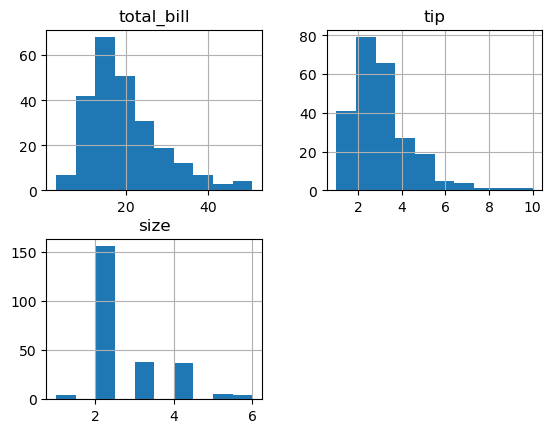

In [7]:
df.hist()

El método cut() permite crear los saltos o los intervalos para cada sección del histograma

In [8]:
bins = [0, 2, 4, float('inf')]
labels = ['small','medium','high']
df['tip_category'] = pd.cut(df['tip'], bins=bins, labels=labels)
df.head(15)

,total_bill,tip,sex,smoker,day,time,size,tip_category
0,16.99,1.01,Female,No,Sun,Dinner,2,small
1,10.34,1.66,Male,No,Sun,Dinner,3,small
2,21.01,3.50,Male,No,Sun,Dinner,3,medium
3,23.68,3.31,Male,No,Sun,Dinner,2,medium
4,24.59,3.61,Female,No,Sun,Dinner,4,medium
5,25.29,4.71,Male,No,Sun,Dinner,4,high
6,8.77,2.00,Male,No,Sun,Dinner,2,small
7,26.88,3.12,Male,No,Sun,Dinner,4,medium
8,15.04,1.96,Male,No,Sun,Dinner,2,small
9,14.78,3.23,Male,No,Sun,Dinner,2,medium


<AxesSubplot: >

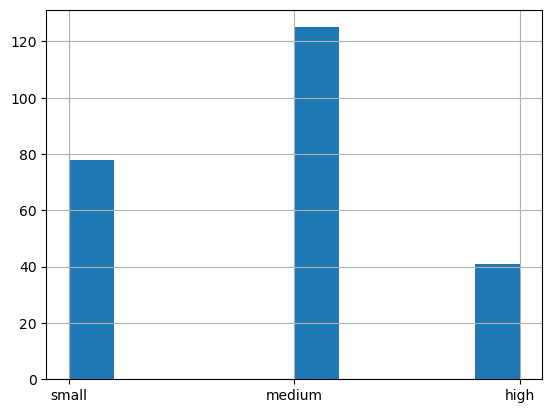

In [9]:
df['tip_category'].hist()